# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

Возможно в некоторых местах я уходил в сторону (особенно в случае работы с данными трудового стажа), но решил оставить так (тем более изначально говорилось про предобработку данных в целом

In [1]:
import pandas as pd

from pymystem3 import Mystem           # импорт бибилиотеки pymystem3
m = Mystem()

data = pd.read_csv('/datasets/data.csv')
data.info() # ознакомление с общей информацией

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


после ознакомления с общей информацией видно, что данные представлены целочисленными значениями, вещественными и типом odject, 
в большинстве столбцов представлены все строки, пропуски есть в days_employd и total_income - причем одинаковое число  
часть столбцов явно количественные, часть категориальные, причем ряд столбцов (например, education_id) повоторяют или дополняют   
информацию других (например, education)  
названия столбцов представлены в "змеином регистре" и не требуют корректировок

In [2]:
# решил посмотреть первые строки таблицы
display(data.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


на этапе выше видно, что в столбце days_employed есть и положительные и отрицательные значения (пока неясно, что это значит)  
видно, что образование написано в разных регистрах, в столбцах про образование, брак и пол видно по два типа значений,  
что вероятно мало для образования и брака, в income_type уже видно больше категорий. В столбце purpose представлены разные   
варианты текста (вероятно там понадобится лемматизация)

In [3]:
# решил посмотреть данные с хвоста
display(data.tail(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


теперь вижу, что категорий образования и брака больше чем 2 (две остаётся только для пола)   
решил для того чтобы составить окончательное впечатление от предварительного знакомства с набором данных применить метод   
value_counts для ряда столбцов (в основном не количественных): 1). число детей колмичественный параметр, но для него применение  
метода счел актуальным, также счел его актуальным для категориальных столбцов, для столбца purpose решил не применять, т.к.  
уже после просмотра начала и хвоста таблицы видно, что вариантов там много и они в основном дублируют себя

In [4]:
data.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [5]:
# для того чтобы вывести value_counts для столбцов решил сделать список columns_for_vc (с именами интересующих столбцов)
# и пройти по нему циклом
columns_for_vc = ['children', 'education', 'education_id', 'family_status', 'family_status_id', 'gender', 'income_type', 'debt']
for i in columns_for_vc:
    print(data[i].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64
среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64
1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64
женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64
0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64
F      14236
M       7288
XNA    

После изучения просмотра значений для столбцов методом value_counts заметил что:
- стобец с числом детей возможно можно считать категориальным (хотя он и является количественным по факту), но это еще не точно. При этом уже сейчас видно, что там есть два ошибочных значения: 20 и -1, -1 явно написано вместо 1, 20 вместо 2 (конечно теоретически возможно, что в семье есть 20 детей, но тогда было бы видно много значений в промежутке - 10, 15 и т.д. детей, кроме того семей с 20 детьми в наборе данных больше чем даже с пятью, хотя полностью исключить возмжоность одной семьи с двадцатью детьми на данном этапе нельзя)
- в столбце с образованием множество дубликатов (в основном из-за регистра) и число категорий не соответствует столбцу education_id при этом в столбце с цифровыми категориями образования education_id все представляется более правильным (вероятно далее на него нужно будет ориентироваться)
- число категорий в столбцах с семейным положением family_status и family_status_id полностью соответствуют
- в столбце с полом есть одно уникальное значение не соответствующее F или M
- в столбце с income_type виден ряд четких категорий (при этом половина категорий с очень малым числом значений), вероятно он потребует дополнительного изучения
- столбец debt содержит в себе две категории




**Вывод**  
Данные представлены целочисленными значениями, вещественными и типом odject. В наборе данных представлены количественные ('children', 'days_employed', 'dob_years', 'total_income') и категориальные ('education', 'education_id', 'family_status', 'family_status_id', 'gender', 'income_type', 'debt') значения, столбец 'purpose' нельзя отнести ни к тем ни к другим (он потребует лемматизации и станет категориальным), при этом столбец 'children', несмотря на то что он количественный, веротнее всего правильнее будет рассмотреть, как категориальный. Большая часть данных не содержит пропусков, пропуски (одинаковое число) есть в столбцах 'days_employed' и 'total_income' - оба столбца содержат вещественные значения.

## Шаг 2. Предобработка данных

### Обработка пропусков

In [6]:
# здесь представлен подсчет пропусков в столбцах 'days_employed', 'total_income' далее я вывел 
# первые 10 значений таблицы с пропусками на экран
columns_null = ['days_employed', 'total_income']
for i in columns_null:
    print('Число пропусков для столбца', i, len(data[data[i].isna()]))
display(data[data['days_employed'].isna()].head(10)) 

Число пропусков для столбца days_employed 2174
Число пропусков для столбца total_income 2174


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Количество пропусков в 'days_employed', 'total_income' одинаковое, при выводе таблице видно, что там где есть пропуск  
в одном столбце - есть и в другом  

Первая мысль для ответа на вопрос про "зависимость между уровнем дохода и возвратом кредита в срок" заполнить пропуски медианными значениями, ориентируюясь на категории из других столбцов, но неясно на какой именно 
столбец ориентироваться, так как ориентирование на категории из одного из столбцов может внести искажения в результаты задачи.
Также есть мысль взять медианные значения по всему набору данных, хотя это тоже может вызвать искажения. 
Чтобы постараться увидеть максимально корректный результат планирую при ответе на вопрос про "зависимость между уровнем дохода и возвратом кредита в срок" использвать данные, как с удаленными пропусками, так и с замененными на медианное значение.

Пропуски значений столбца 'days_employed' не должны повлиять на основные вопросы, но планирую их заменить для отработки информации полученной в ходе спринта.

**Вывод**  
Обнаружены пропуски в столбцах 'days_employed' и 'total_income' - одинаковое число пропусков в одних и тех же строках. Возможное появление пропусков случайные сбои - в том как выглядт пропуски не видно закономерности

### Замена типа данных

Максимальные значения столбца days_employed: 401755.40047533
Минимальные значения столбца days_employed: -18388.949900568383


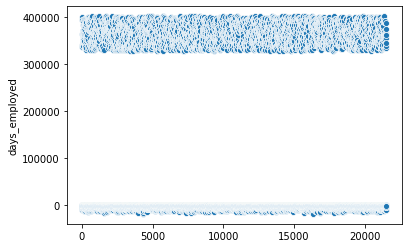

In [7]:
# с учетом того, что в столбце 'days_employed' я заметил и положительные и отрицательные значенияя, а также очень большие 
# значения я решил посмотреть на минимальные и максимальные значения, а также визуализировать данные
print('Максимальные значения столбца days_employed:', data['days_employed'].max())
print('Минимальные значения столбца days_employed:', data['days_employed'].min())
import seaborn as sns
sns.scatterplot(data = data, x= range(len(data['days_employed'])), y = data['days_employed'])

на графике видно, что значения в столбце 'days_employed' распределяются странным образом: меньшая часть значений отрицательная (минимальное около -18000) при этом абсолютная величина таких значений выглядит реалистично, но большая часть значений находится в интервал между 300000 и 400000, что выглядит нереалистичным (человек столько не живет)

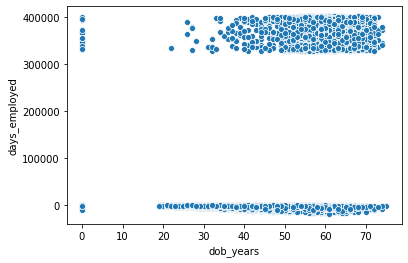

In [8]:
# далее я решил посмотреть на распределние значений 'days_employed' в зависимости от возраста (логично если значения будут расти)
sns.scatterplot(data = data, x= data['dob_years'], y = data['days_employed'])

на графике выше видно что:  
- часть значений возраста нулевые (раньше это не было заметно) - видимо данные о возрасте забыли вбить
- отрицательные значения ведут себя более реалистично (растут вместе с возрастом), положительные значения ведут себя странно (не растут вместе с возрастом, но в интервале возраста 50 и более лет встречаются чаще)

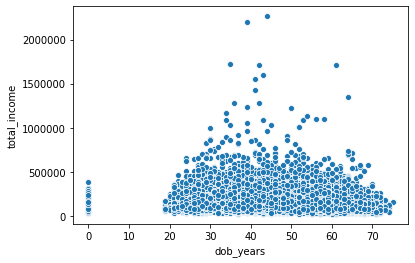

In [9]:
# решил по такому же принципу посмотреть распределение значений столбца 'total_income'
sns.scatterplot(data = data, x= data['dob_years'], y = data['total_income'])

также как и в случае с 'dob_years' видно, что часть значений возраста нулевые, но в целом распределение 'total_income' в зависимости от возраста выглядит вполне реалистичным  

In [10]:
# здесь поставлена замена пропусков в days_employed (т.к. выше уже видно, что отрицательные данные реалистичнее, то расчет
# опирается на них)
data_de_negative = data.loc[data['days_employed'] <= 0] 
days_employed_median = abs(data_de_negative['days_employed'].median()) # расчет медианного значения стажа исходя из
                                                                            # реалистичных данных

data['days_employed'] = data['days_employed'].fillna(days_employed_median) # замена пропусков медианным значением
data['days_employed'] = data['days_employed'].astype('int') # перевод вещественных значений стажа в целочисленные

data_de_negative['days_employed'] = data_de_negative['days_employed'].astype('int') # перевод вещественных значений стажа в целочисленные

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 4 to 21521
Data columns (total 12 columns):
children            5619 non-null int64
days_employed       5619 non-null int64
dob_years           5619 non-null int64
education           5619 non-null object
education_id        5619 non-null int64
family_status       5619 non-null object
family_status_id    5619 non-null int64
gender              5619 non-null object
income_type         5619 non-null object
debt                5619 non-null int64
total_income        3445 non-null float64
purpose             5619 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 570.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15906 entries, 0 to 21524
Data columns (total 12 columns):
children            15906 non-null int64
days_employed       15906 non-null int64
dob_years           15906 non-null int64
education           15906 non-null object
education_id        15906 non-null int64
family_status       1

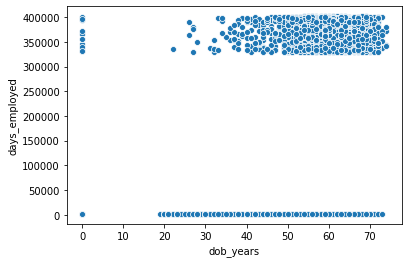

In [11]:
# здесь я решил визуализировать по отдельности отрицательные и положительные значения столбцов 'days_employed' 
# и посмотреть соотношение отрицательных и положительных значений в них

data_de_positive = data.loc[data['days_employed'] > 0]
print(data_de_positive.info())
print(data_de_negative.info())

# ниже график для положительных значений 'days_employed'
sns.scatterplot(data = data_de_positive, x= data_de_positive['dob_years'], y = data_de_positive['days_employed'])

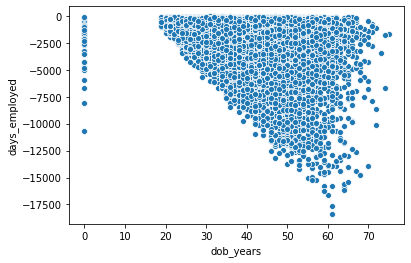

In [12]:
# ниже график для отрицательных значений 'days_employed'
sns.scatterplot(data = data_de_negative, x= data_de_negative['dob_years'], y = data_de_negative['days_employed'])

в двух графиках выше видно, что распределение стажа, в тех случаях когда он представлен отрицательными значениями вполне реалистично (вероятно счетчик настроен вниз от нуля). положительные значения (в интервале 300 - 400 тысяч дней) выглядят нереальными, причем у меня не получается понять как они появились (это явно не результат случайного умножения на 10, 100 или возведения в квадрат), возможно какая-то ошибка в обработке данных после ввода (если там часы или минуты - тоже не похоже на правду). Единственное, что заметно - в возрастном интервале 50 и больше лет таких значений намного больше. Также заметно, что положительных значение больше, чем отрицательных (15906 против 3445).

Далее по замене данных решил сделать следующее: 

- для трудового стажа взять медиану для абсолютных значений в тех случаях когда стаж меньше нуля и заменить на это значение все отсутствующие значения в столбце, а также все исходно положительные (в случае если бы основные вопросы задания включали в себя   трудовой стаж более корректным было бы сделать такую замену ориентируясь на возрастные катгеории, но для требуемых целей корректно так)
- для нулевых значений по возрасту **сделана замена на медиану** (как и в случае с трудовым стажем это не повлияет на основные вопросы, в другом случае можно было бы ориентироваться на данные трудового стажа)
- отсутствующие значения по уровню дохода можно заменить медианным значением по столбцу 
- аномальные значения по числу детей (-1 и 20) необходимо заменить
- одно аномальное значение по полу можно заменить на этапе категоризации
- заменить вещественные значения на целочисленные можно для столбцов 'days_employed', 'total_income', смысла в данных после запятой для этих столбцов не видно

In [13]:
# замена значений трудового стажа

def de_correction(de): # функция для замены методом apply нереалистичных значений стажа (> 300000) на медианные и для перевода 
                       # отрицательных значений в положительные 
    if de > 300000:
        return days_employed_median
    else:
        de = abs(de)
        return de
data['days_employed'] = data['days_employed'].apply(de_correction)

In [14]:
# замена значений возраста
def age_correction(age): # функция для замены методом apply нулевых значений возраста на медианные
    if age == 0:
        return data['dob_years'].median()
    else:
        return age
data['dob_years'] = data['dob_years'].apply(age_correction)

In [15]:
# замена нереалистичных значений числа детей
def replace_children(age_children):  # функция для замены некорректных значений числа детей c применением метода apply
    if age_children == -1:
        return 1
    if age_children == 20:
        return 2
    else:
        return age_children
data['children'] = data['children'].apply(replace_children)

Число пропусков в столбце значений стажа: 0
Минимальное значение возраста: 19.0
Минимальное значение числа детей: 0
Максимальное значение числа детей: 5


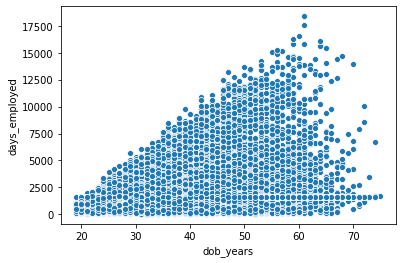

In [16]:
# проверка замен
print('Число пропусков в столбце значений стажа:', len(data[data['dob_years'].isna()])) # проверка замены пропусков в столбце 'dob_years'
sns.scatterplot(data = data, x= data['dob_years'], y = data['days_employed']) # проверка того как выглядят данные столбца 
# 'dob_years' после замен
print('Минимальное значение возраста:', data['dob_years'].min()) # проверка замены нулевых значений возраста (вывод минимального значения)
print('Минимальное значение числа детей:', data['children'].min()) # проверка замены числа детей 
print('Максимальное значение числа детей:', data['children'].max()) # проверка замены числа детей

после замен, данные по стажу стали выглядеть реалистично (хотя некоторое икажение от медианного значения на графике заметно), нулевых данных по возрасту больше нет, нереалистичных значений по числу детей нет.

In [17]:
# работа с данными о доходе

data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('median')) # заполнение
# пропусков опираясь на данные столбца о типе занятости, в соотеветствии с показаным методом
data['total_income'] = data['total_income'].astype('int') # перевод вещественных значений дохода в целочисленные

**Вывод**  
заменил пропуски и некорректные значения в столбце с днями трудового стажа (для замены использована медианное значение по реалистичным данным)
заменены нулевые значения возраста (для замены использованы **медианные** значения возраста)
заменены некорректные значения числа детей
**пропуски в столбце по уровню дохода заменены медианным значением с учетом типа занятости**

### Обработка дубликатов

In [18]:
# методом duplicated проводится поиск явных дубликатов
print(data.duplicated().sum()) 

55


In [19]:
# явных дубликатов 55 их можно удалить
data = data.drop_duplicates() # удаление явных дубликатов
print(data.duplicated().sum()) # проверка

0


In [20]:
# на этапе знакомства с данными после применения метода value_counts было видно много дубликатов в столбце 'education', возникших 
# из-за прменения разных регистров 
print(data['education'].unique())

['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']


In [21]:
data['education'] = data['education'].str.lower() # с помощью метода str.lower все значения переводяться в нижний регистр
print(data['education'].unique()) # проверка перевода значений

print(data['education'].value_counts()) # дополнительная проверка - если результаты value_counts для столбцов 'education'
print(data['education_id'].value_counts()) # и 'education_id' будут одтнаковыми - можно получить увереность в правильности замены


#stock['count'] = stock['count'].replace(10, apple)

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']
среднее                15187
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64
1    15187
0     5251
2      744
3      282
4        6
Name: education_id, dtype: int64


In [22]:
print(data.duplicated().sum()) # после замены значений в столбце 'education' нужно еще раз вызывать метод duplicated

17


In [23]:
# появилось еще 17 дубликатов их также можно удалить методом drop_duplicates()
data = data.drop_duplicates() # удаление явных дубликатов
print(data.duplicated().sum()) # проверка

0


**Вывод**  
В наборе данных встретились 54 явных дубликата, они были удалены. Для того чтобы выявить неявные дубликаты значения столбца 'education' были приведены к нижнему регистру - выявлено еще 17 дубликатов - они удалены

### Лемматизация

In [24]:
print(data['purpose'].unique()) # сначала я решил ознакомиться со списком уникальных значений столбца 'purpose', для того,
                                # чтобы предварительно понять какое число категорий нужно 
                                # будет выбрать после лемматизации
    
text = ' '.join(data['purpose'].unique()) # объединение списка уникальных значений в строку

lemmas = m.lemmatize(text) # лемматизация (сделать в одну строку без переменной text не сумел)
print(lemmas)
from collections import Counter # подсчет встречаемости слов среди списка уникальных значений столбца 'purpose'
print(Counter(lemmas))           # дополнительная информация

# В итоге решил выбрать 4 категории: недвижимость, автомобиль, свадьба и образование
# отдельные слова наводят на мысль о выделении дополнительных категорий (поддержанный автомобиль), (дополнительное образование),
# (коммерческая недвижимость) и др., но исходя из контекстов трудно понять характеристики альтернатив таких категорий

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']
['покупка', ' ', 'жилье', ' '

In [25]:
def cateorize_purpose(row):                        #  функция для создания столбца с категориями целей взятия кредита
    purpose = row['purpose']
    lemmas = ''.join(m.lemmatize(purpose))
    if 'жилье' in lemmas or 'недвижимость' in lemmas:
        return 'недвижимость'
    if 'образование' in lemmas:
        return 'образование'
    if 'свадьба' in lemmas:
        return 'свадьба'                     
    if 'автомобиль' in lemmas:
        return 'автомобиль'
    else:
        return 'неизвестно'
    
data['purpose_lemmatize'] = data.apply(cateorize_purpose, axis=1)   # создание столбца с категориями - у меня получилось
                                                                    # применить только ко всему набору данных (не к одному столбцу)
print(data['purpose_lemmatize'].value_counts())    # проверка (если все значения затронуты - значение 'неизвестно' - не появится)

недвижимость    10811
автомобиль       4306
образование      4013
свадьба          2323
Name: purpose_lemmatize, dtype: int64


**Вывод**  
проведена лемматизация данных в столбце 'purpose' с её помощью выбраны категории целей взятия кредита  
далее с помощью лемматизации создан столбец с категориями взятия кредита

### Категоризация данных

На данный момент значительная часть данных уже категоризированна (но еще не все):
- **число детей в целом интересно рассмотреть как ряд категорий, в то же время можно ввести дополнительный столбец с 4-мя категориями (0, 1, 2, многодетные)**
- образование категоризровано в ходе работе с дубликатами (плюс в столбце education_id исходно были нужные категории), плюс вопрос про образование исходно не ставится
- цели кредита категоризированны в ходе лемматизации
- семейное положение категоризировано исходно - возможно в ходе ответа на вопрос оно потребует дополнительной категоризации, но это будет лучше видно по ходу работы над вопросом
- **данные о доходе нуждаются в категоризации**
- данные о поле уже категоризированны (было видно одно аномальное значение, но сложно понять на какое его заменить - в случае если рассмотрение пондобится там можно применить кострукцию try-except, применение которой предполагается заданием, но я пока не увидел места для её применения) - вопрос про пол исходно не ставился
- вопрос про данные о типе дохода не ставился, но в случае работы над ним все еденичные значения (безработный, декрет, предприниматель, студент) будет лучше объединить с большими группами - в то же время не вполне ясно, как быть с большими группами - на первый взгляд кажется логичным объединить их все кроме пенсионера

In [26]:
# дополнительная категоризация столбца с числом детей
def children_category(children):   # фунция для дополнительной категоризации числа детей
    if children >= 3:
        return 'многодетные'  
    if children == 2:
        return 'двое детей'        # так как категория многодетные представлена текстовым значением остальные тоже решил  
    if children == 1:              # сделать текстовыми
        return 'один ребенок'
    else:
        return 'нет детей'
data['children_categories'] = data['children'].apply(children_category)
print(data['children_categories'].value_counts()) # проверка

нет детей       14090
один ребенок     4855
двое детей       2128
многодетные       380
Name: children_categories, dtype: int64


Медианный доход: 142594.0
Минимальный доход: 20667
Максимальный доход: 2265604


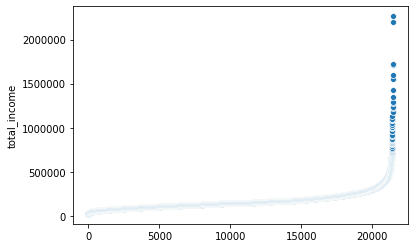

In [27]:
# категоризация данных о доходе
print('Медианный доход:', data['total_income'].median()) 
print('Минимальный доход:', data['total_income'].min()) 
print('Максимальный доход:', data['total_income'].max())

# распределение вариантов общего дохода по возрастанию
sns.scatterplot(data = data, x= range(len(data['total_income'])), y = data['total_income'].sort_values()) 

из графика видно, что доход распределятся неравномерно: можно попробовать выделить 4 категории:  
- больше 500000, 
- 200000-500000, 
- 100000-200000 (с учетом того что 145000 - медианное значение) 
- и <100000 

In [28]:
# категоризация данных о доходе 

def total_income_categorize(incom): # функция для категоризации дохода методом apply                   
    if incom >= 500000:
        return 'очень высокий доход'
    if 500000 > incom >= 200000:
        return 'высокий доход'
    if 200000 > incom >= 100000:
        return 'средний доход'
    else:
        return 'низкий доход'

data['total_income_cat'] = data['total_income'].apply(total_income_categorize)
data['total_income_cat'].value_counts()

средний доход          11923
высокий доход           4845
низкий доход            4463
очень высокий доход      222
Name: total_income_cat, dtype: int64

**Вывод**  
проведена категоризация данных о числе детей (данные о детях до категоризации тоже могут быть полезны) и об уровне дохода
остальные данные категоризованны на более ранних этапах (цель, семейное положение) или не требовали категоризации

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [29]:
print(data.columns) # вывод значений столбцов (для того чтобы иметь их под рукой и быстрее ориентироваться)
print(data['debt'].value_counts()) # вывод числа вариантов значений столбца 'debt' для подсчета среднего процента задолженности

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose', 'purpose_lemmatize', 'children_categories',
       'total_income_cat'],
      dtype='object')
0    19712
1     1741
Name: debt, dtype: int64


In [30]:
debt_rate = 1741/19713  # подсчет среднего процента задолженности
print(f'{debt_rate:.2%}') # вывод среднего процента задолженности

8.83%


In [31]:
# рассмотрение вопроса про связь числа детей и возвратом кредита в срок
# (вариант где каждое число детей категория)

data_grouped_by_children = data.groupby('children').agg({'debt': ['count', 'sum']}) # группировка данных по стообцу о
# числе детей и пременеие метода agg() для подсчета числа значений в столбце 'debt' (будет отражать общее число прдеставителей
# категории) и суммы значений (будет отражать число представителей с задолженностью, т.к. наличие задолженности отмечено цифрой 1)


def relate_count(row):                         #  функция для подсчета процента задолженностей (будет использована и для других данных)
    count_data = row[('debt', 'count')]
    sum_data = row[('debt', 'sum')]
    return f'{sum_data / count_data:.2%}'

data_grouped_by_children['relation'] = data_grouped_by_children.apply(relate_count, axis=1) # добавление столбца с процентом
                                                                                            # задолженности
display(data_grouped_by_children) 

debt       relation
          count   sum         
children                      
0         14090  1063    7.54%
1          4855   445    9.17%
2          2128   202    9.49%
3           330    27    8.18%
4            41     4    9.76%
5             9     0    0.00%

In [32]:
# рассмотрение вопроса про связь числа детей и возвратом кредита в срок
# (вариант где число детей >= 3 - многодетные)
data_grouped_by_children_cat = data.groupby('children_categories').agg({'debt': ['count', 'sum']})
data_grouped_by_children_cat['relation'] = data_grouped_by_children_cat.apply(relate_count, axis=1)
display(data_grouped_by_children_cat) 

debt       relation
                     count   sum         
children_categories                      
двое детей            2128   202    9.49%
многодетные            380    31    8.16%
нет детей            14090  1063    7.54%
один ребенок          4855   445    9.17%

In [33]:
# таблица с более наглядным представлением
info = pd.DataFrame(data=[['двое детей', 9.49], ['многодетные', 8.16], ['нет детей', 7.54], ['один ребенок', 9.17], ['среднее по всем данным', 8.83]], columns=['категория', 'процент наличия факта задолженности'])
info = info.sort_values(by='процент наличия факта задолженности') # сортировка для наглдяности
display(info)

,категория,процент наличия факта задолженности
2,нет детей,7.54
1,многодетные,8.16
4,среднее по всем данным,8.83
3,один ребенок,9.17
0,двое детей,9.49


**Вывод**  
Более логично использование данных, где многодетные выделены в отдельную категорию (т.к. их и так немного).  
Видно, что наименьший процент задолженности у группы без детей (ниже среднего по всем данным), у тех у кого есть один ребенок 
выше (и выше срденей), у тех у кого двое детей еще выше. Многодетные родители имеют процент задолженности ниже среднего (но выше, чем люди без детей), но это может быть связано с низкой выборкой по ним.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [34]:
# рассмотрение вопроса про связь семейного положения и возврата кредита в срок
data_grouped_by_family = data.groupby('family_status').agg({'debt': ['count', 'sum']})
data_grouped_by_family['relation'] = data_grouped_by_family.apply(relate_count, axis=1)
display(data_grouped_by_family) 

debt      relation
                       count  sum         
family_status                             
Не женат / не замужем   2810  274    9.75%
в разводе               1195   85    7.11%
вдовец / вдова           959   63    6.57%
гражданский брак        4150  388    9.35%
женат / замужем        12339  931    7.55%

In [35]:
# таблица с более наглядным представлением
info = pd.DataFrame(data=[['Не женат / не замужем', 9.75], ['в разводе', 7.11], ['вдовец / вдова', 6.57], ['гражданский брак', 9.35], ['женат / замужем', 7.55], ['среднее по всем данным', 8.83]], columns=['категория', 'процент наличия факта задолженности'])
info = info.sort_values(by='процент наличия факта задолженности') # сортировка для наглдяности
display(info)

,категория,процент наличия факта задолженности
2,вдовец / вдова,6.57
1,в разводе,7.11
4,женат / замужем,7.55
5,среднее по всем данным,8.83
3,гражданский брак,9.35
0,Не женат / не замужем,9.75


In [36]:
print('Процент наличия факта задолженности у тех кто состоит/состоял в официальном браке:', f'{(6.57 + 7.11 + 7.55) / 3:.2f}')
print('Процент наличия факта задолженности у тех кто не состоит в официальном браке:', f'{(9.35 + 9.75) / 2:.2f}')

Процент наличия факта задолженности у тех кто состоит/состоял в официальном браке: 7.08
Процент наличия факта задолженности у тех кто не состоит в официальном браке: 9.55


**Вывод**  
Исходя из имеющихся данных видно, что те кто состоит или состоял в официальном браке имеют процент наличия факта задолженности ниже среднего, а те кто не состоит выше. Конечно часть людей заявляющих гражданский брак могла ранее состоять в браке, но в общем для банка менее рисковано взаимодействие с людьми состоящими (или состоявшими) в официальном браке 



У меня не получается однозначно ответить - я попытался применить pivot_table, чтобы через них высмотреть какой-то фактор (ниже привел один из примеров - исходно мне показалось важным рассмотреть возраст в контексте брака) - но именно однозначное цифровое значение получить не могу (по ходу рассмотрения увидел, что очень важны пол, образование и возраст все таки важен и значения  
задолженностей несколько варьируют среди групп по браку для разных возрастов и полов, но в основном соотношения похожи.  ответить именно на вопрос **почему пребывание(сейчас или раньше) в официальном браке это положительный показатель  способности заёмщика вернуть кредит?** могу только предположением:  

В случае развода заемщик (это в основном женщины) могут получать алименты (самый низкий процент невзоврата в зоне 35-46 лет), в случае вдов/вдовцов нажитое имущество (самый низкий процент невзоврата в 47-59 лет из тех групп которые посмотрел).  
Хотя размеры групп "в разводе" и "вдова/вдовец" растут с возрастом, но их в основном меньше, чем остальных - поэтому главный вопрос **из-за чего состояние в официальном браке дает меньшую рискованность в плане возврата кредита, чем гражданский брак или его отсутствие**: состояние в официальном браке говорит о наличии у заемщиков более стабильных пар, в которых имеются юридические обязательства (стабильные пары в свою очередь могут говорить о большей стабильности в финансовом плане, чем отсутствие брака и меньшей вероятности прерывания юридических обязательств, чем в случае гражданского брака).
    
(хотя конечно это общее ощущение возможно вообще неверное, ну и частные случаи могут быть совершенно различными) 



Медианный возраст: 42.0
Минимальный возраст: 19.0
Максимальный возраст: 75.0


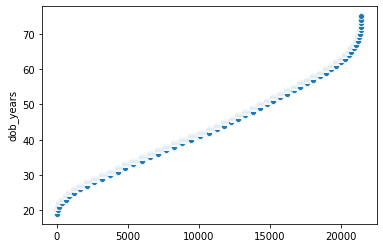

In [37]:
# категоризация данных о возрасте
print('Медианный возраст:', data['dob_years'].median()) 
print('Минимальный возраст:', data['dob_years'].min()) 
print('Максимальный возраст:', data['dob_years'].max())

# распределение вариантов общего дохода по возрастанию
sns.scatterplot(data = data, x= range(len(data['dob_years'])), y = data['dob_years'].sort_values()) 

In [38]:
# категоризация данных о возрасте

def dob_years_categorize(age): # функция для категоризации возраста методом apply                   
    if age >= 60:
        return 'пенсионер'
    if 60 > age >= 47:
        return '47-59 лет'
    if 47 > age >= 35:
        return '35-46 лет'
    if 35 > age >= 25:
        return '25 - 34 года'
    else:
        return 'моложе 25'

data['dob_years_cat'] = data['dob_years'].apply(dob_years_categorize)
data['dob_years_cat'].value_counts()

35-46 лет       6808
47-59 лет       6178
25 - 34 года    5092
пенсионер       2500
моложе 25        875
Name: dob_years_cat, dtype: int64

In [39]:
# зедсь сводная таблица по семейному статусу для значений столбца по категориям возраста, 
# в качестве значений приведен столбец с задолженостями, применена функция суммы
data_pivot_s = data.pivot_table(index=['family_status'], columns='dob_years_cat',  values='debt', aggfunc='sum')

In [40]:
# применена функция count для того чтобы видеть соотношение представителей подгрупп
data_pivot_c = data.pivot_table(index=['family_status'], columns='dob_years_cat',  values='debt', aggfunc='count')
display(data_pivot_c)

dob_years_cat,25 - 34 года,35-46 лет,47-59 лет,моложе 25,пенсионер
family_status,,,,,
Не женат / не замужем,955,706,547,362,240
в разводе,185,427,412,16,155
вдовец / вдова,16,111,429,1,402
гражданский брак,1037,1409,1090,220,394
женат / замужем,2899,4155,3700,276,1309


In [41]:
# подсчитал процент задолженностей (не сумел сделать форматирование в процентах для этой ситуации - поэтому умножил на 100)
data_p_rel = data_pivot_s / data_pivot_c * 100
display(data_p_rel)

dob_years_cat,25 - 34 года,35-46 лет,47-59 лет,моложе 25,пенсионер
family_status,,,,,
Не женат / не замужем,12.356021,9.490085,7.129799,11.325967,3.750000
в разводе,11.351351,5.386417,6.796117,12.500000,7.096774
вдовец / вдова,12.500000,8.108108,5.827506,0.000000,6.716418
гражданский брак,11.475410,9.936125,8.256881,9.545455,4.568528
женат / замужем,10.451880,7.725632,6.081081,8.695652,4.430863


- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [42]:
# рассмотрение вопроса про уровень дохода и возвратом кредита в срок 

data_grouped_by_total_incom = data.groupby('total_income_cat').agg({'debt': ['count', 'sum']})
data_grouped_by_total_incom['relation'] = data_grouped_by_total_incom.apply(relate_count, axis=1)
display(data_grouped_by_total_incom) 

debt       relation
                     count   sum         
total_income_cat                         
высокий доход         4845   344    7.10%
низкий доход          4463   354    7.93%
очень высокий доход    222    14    6.31%
средний доход        11923  1029    8.63%

Видно, что для выделенных категорий в зависимости от дохода процент наличия факта задолженности всегда меньше среднего по набору данных. 

In [43]:
# таблица с более наглядным представлением
info = pd.DataFrame(data=[['высокий доход', 7.10], ['низкий доход', 7.93], ['очень высокий доход', 6.31], ['средний доход', 8.63], ['среднее по всем данным', 8.83]], columns=['категория', 'процент наличия факта задолженности'])
info = info.sort_values(by='процент наличия факта задолженности') # сортировка для наглдяности
display(info)

,категория,процент наличия факта задолженности
2,очень высокий доход,6.31
0,высокий доход,7.10
1,низкий доход,7.93
3,средний доход,8.63
4,среднее по всем данным,8.83


**Вывод**  
Процент наличия факта задолженности по категориям общего дохода всегда меньше среднего по набору данных. Наименьший процент задолженностей у людей с очень высоким доходом (эта группа очень мала), также видно что в случае высокого или низкого дохода процент задолженностей ниже, чем в случае среднего

- Как разные цели кредита влияют на его возврат в срок?

In [44]:
# рассмотрение вопроса про связь целей кредита и возврата кредита в срок
data_grouped_by_purpose = data.groupby('purpose_lemmatize').agg({'debt': ['count', 'sum']})
data_grouped_by_purpose['relation'] = data_grouped_by_purpose.apply(relate_count, axis=1)
display(data_grouped_by_purpose) 

debt      relation
                   count  sum         
purpose_lemmatize                     
автомобиль          4306  403    9.36%
недвижимость       10811  782    7.23%
образование         4013  370    9.22%
свадьба             2323  186    8.01%

In [45]:
# таблица с более наглядным представлением
info = pd.DataFrame(data=[['автомобиль', 9.36], ['недвижимость', 7.23], ['образование', 9.22], ['свадьба', 8.00], ['среднее по всем данным', 8.83]], columns=['категория', 'процент наличия факта задолженности'])
info = info.sort_values(by='процент наличия факта задолженности') # сортировка для наглдяности
display(info)

,категория,процент наличия факта задолженности
1,недвижимость,7.23
3,свадьба,8.00
4,среднее по всем данным,8.83
2,образование,9.22
0,автомобиль,9.36


**Вывод**  
Видно, что в случае взятия кредита на недвижимость процент задолженности наиболее низкий. В случае свадьбы тоже ниже среднего.
В случае когда кредит берут на образование или на автомобиль процент задолженности выше срденего.



    
Здесь пока общее предположение напишу (не стал пытаться, что-то выявить, как в случае с семейным положением, так как мне  
кажется, что и здесь четких цифр не получу):  
Кредит на недвижимость может предполагать ипотеку (быть кредитом под залог недвижимости) и это может быть фактором,   
требующим более ответственного отношения к кредиту.     
Кредит на свадьбу должен быть относительно небольшим и связан с большим  
числом людей (вступающие в брак, родственики и.т.д.)  
Кредит на образование должен быть более распространенн среди групп с меньшим возрастом (пока пытался увидеть причины  
положительного влияния брака на снижение процента задолженностей видел, что меньший возраст сам по себе негативно влияет)  
Кредит на автомобиль скорее всего не предполагает залога и автомобиль менее нерушим, чем недвижимость. 



## Шаг 4. Общий вывод

По итогам рассмотрения четырех факторов видно следующее:
- рост числа детей негативный показатель способности потенциального заёмщика вернуть кредит банку
- состояние в официальном браке (сейчас или ранее) положительный показатель способности потенциального заёмщика вернуть кредит банку
- наличие высокого дохода положительно влияет на способность потенциального заёмщика вернуть кредит банку (при этом низкий доход является более положительным фактором, чем средний). в общем категории дохода менее весомы, чем три другие фактора (процент задолженностей в категорияях дохода всегда меньше среднего)
- если цель кредита недвижимость, то это положительный показатель способности потенциального заёмщика вернуть кредит банку (свадьба тоже), цель кредита автомобиль и образование - негативный показатель.